In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# Q1. Import the dataset and examine the variables

data = pd.read_csv('diabetes.csv')

# Display basic information about the dataset
print(data.head())
print(data.info())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [5]:
# Q2. Data Preprocessing
# Handling missing values (assuming missing values are represented as 0s in this dataset)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.dropna(inplace=True)

# Removing outliers (you may need to choose an appropriate method)
# Example: Removing outliers using Z-score
from scipy.stats import zscore
z_scores = zscore(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
data = data[(z_scores < 3).all(axis=1)]

# Convert categorical variable 'Outcome' into a binary numeric variable (0 or 1)
data['Outcome'] = data['Outcome'].astype(int)

In [6]:
# Q3. Data Splitting
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Q4. Decision Tree Model
# Train a decision tree classifier (you can fine-tune hyperparameters)
clf = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Accuracy: 0.7432432432432432
Precision: 0.9230769230769231
Recall: 0.4
F1 Score: 0.5581395348837209
Confusion Matrix:
[[43  1]
 [18 12]]
ROC AUC Score: 0.7310606060606061


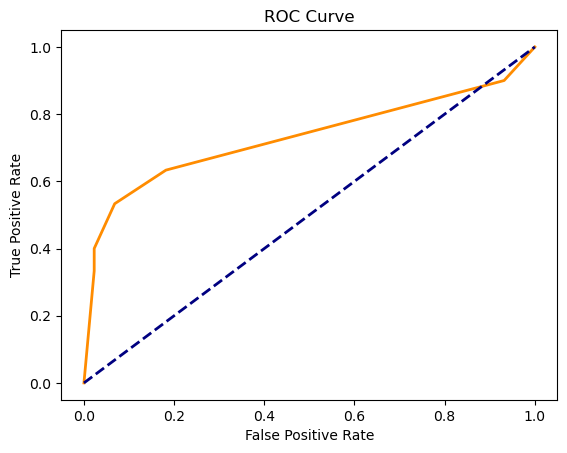

In [9]:
# Q5. Model Evaluation
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

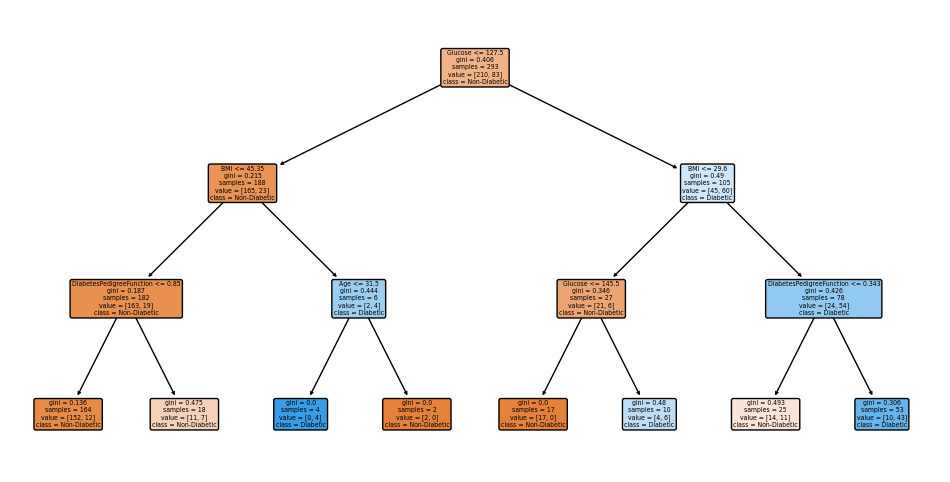

In [10]:
# Q6. Interpretation: Visualize the decision tree (you may need to install 'graphviz' and 'pydotplus' libraries)
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()

In [ ]:
Q7) Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [11]:
 # Sensitivity to max_depth hyperparameter (Sensitivity testing)
depths = [3, 5, 7, 9]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Max Depth = {depth}: Accuracy = {accuracy}')


Max Depth = 3: Accuracy = 0.7432432432432432
Max Depth = 5: Accuracy = 0.7432432432432432
Max Depth = 7: Accuracy = 0.7297297297297297
Max Depth = 9: Accuracy = 0.7432432432432432


In [13]:
# Scenario 1: Extreme Glucose level (Scenario Testing)
X_scenario1 = X_test.copy()
X_scenario1['Glucose'] = 200  # Simulate an extreme glucose level
y_pred_scenario1 = clf.predict(X_scenario1)
print(f'Scenario 1 - Extreme Glucose: Predicted Diabetes Cases: {sum(y_pred_scenario1)}')

# Scenario 2: Increased Diabetes Prevalence
X_scenario2 = X_test.copy()
y_pred_scenario2 = np.random.choice([0, 1], size=len(X_scenario2), p=[0.3, 0.7])
print(f'Scenario 2 - Increased Diabetes Prevalence: Predicted Diabetes Cases: {sum(y_pred_scenario2)}')


Scenario 1 - Extreme Glucose: Predicted Diabetes Cases: 40
Scenario 2 - Increased Diabetes Prevalence: Predicted Diabetes Cases: 46
